In [33]:
!unzip -q traj1.zip #unzipping pnp of utenzils folder

In [34]:
import pickle

# loading the pickle file
with open('/content/traj1/obs_dict.pkl', 'rb') as file:
    obs_dict = pickle.load(file)

# printing the values to check
print(obs_dict.keys())


dict_keys(['joint_effort', 'qpos', 'qvel', 'full_state', 'state', 'desired_state', 'time_stamp', 'eef_transform', 'high_bound', 'low_bound', 'env_done', 't_get_obs'])


In [41]:
print(obs_dict['eef_transform'])

[[[-0.07499286  0.00864171  0.99714663  0.31416547]
  [ 0.00413435  0.99995655 -0.00835513 -0.02339584]
  [-0.9971755   0.00349598 -0.07502532  0.06205847]
  [ 0.          0.          0.          1.        ]]

 [[-0.1024199   0.00265912  0.9947377   0.31166171]
  [ 0.0061575   0.99997896 -0.00203914 -0.02321115]
  [-0.9947222   0.00591624 -0.10243412  0.05390453]
  [ 0.          0.          0.          1.        ]]

 [[-0.1178649  -0.09889401  0.98809303  0.30405566]
  [-0.00131493  0.99504341  0.0994328  -0.0041694 ]
  [-0.99302877  0.01042037 -0.11741073  0.04735322]
  [ 0.          0.          0.          1.        ]]

 [[-0.10710994 -0.27942861  0.95417352  0.28733993]
  [-0.02013687  0.9601073   0.27890586  0.03055579]
  [-0.99404324  0.01065952 -0.10846386  0.05215584]
  [ 0.          0.          0.          1.        ]]

 [[-0.08742874 -0.47964483  0.87309625  0.26811721]
  [-0.04132643  0.87744422  0.47789515  0.06407928]
  [-0.99531319  0.00569982 -0.09653585  0.05342748]
  [ 

In [9]:
import pickle

# loading the pickle file
with open('/content/traj1/policy_out.pkl', 'rb') as file:
    obs_dict = pickle.load(file)

# printing the values to check
print(obs_dict)

[{'actions': array([-0.01588825,  0.04458054, -0.00344063, -0.00150252, -0.00242177,
        0.42254094,  0.99576901])}, {'actions': array([-2.07002505e-02,  5.84556846e-02,  2.22717414e-05, -5.17149429e-03,
        5.44152600e-04,  4.19823459e-01,  9.99180634e-01])}, {'actions': array([-0.01088369,  0.03812869, -0.00211943, -0.00828064, -0.00381507,
        0.30561791,  1.        ])}, {'actions': array([-7.15014805e-04,  3.62470447e-02,  2.56566605e-03,  3.88672255e-03,
       -7.53284804e-03,  1.28893976e-01,  1.00000000e+00])}, {'actions': array([ 0.00591606,  0.01897691, -0.00748332,  0.00590264,  0.00452312,
       -0.10785964,  1.        ])}, {'actions': array([-2.59812254e-03,  1.62264320e-02, -2.68401339e-03, -6.82554083e-04,
        2.59951837e-03, -2.58034099e-01,  9.97256578e-01])}, {'actions': array([ 0.00731251,  0.00638109,  0.01030955, -0.00689983,  0.00411236,
       -0.29824248,  0.99320108])}, {'actions': array([ 0.0039    ,  0.00731242, -0.0156469 ,  0.00569238, -0.0

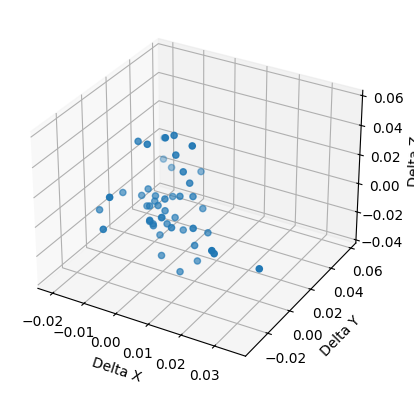

In [10]:
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # need for 3d plotting

# Loading the pickle file
with open('/content/traj1/policy_out.pkl', 'rb') as file:
    policy_out = pickle.load(file)

# Extracting the first three numbers from the 'actions' array in each dictionary
xs, ys, zs = [], [], []
for entry in policy_out:
    actions = entry['actions']
    xs.append(actions[0])
    ys.append(actions[1])
    zs.append(actions[2])

# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)

# Labelling the axes
ax.set_xlabel('Delta X')
ax.set_ylabel('Delta Y')
ax.set_zlabel('Delta Z')

plt.show()


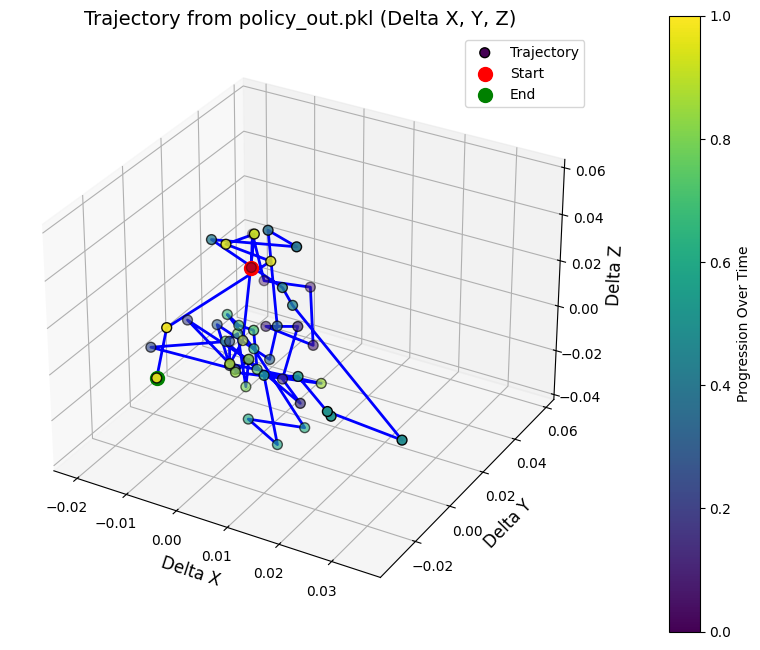

In [11]:
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Loading the policy_out data from the pkl file
with open('/content/traj1/policy_out.pkl', 'rb') as file:
    policy_out = pickle.load(file)

# Extract the first three numbers (delta x, delta y, delta z) from each entry's 'actions' array
xs = [entry['actions'][0] for entry in policy_out]
ys = [entry['actions'][1] for entry in policy_out]
zs = [entry['actions'][2] for entry in policy_out]

# adding a color gradient for the trajectory based on the number of points
colors = np.linspace(0, 1, len(xs))

# Plotting the trajectory in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color gradient
sc = ax.scatter(xs, ys, zs, c=colors, cmap='viridis', marker='o', s=50, edgecolor='k', label='Trajectory')

# Drawing a continuous line along the trajectory
ax.plot(xs, ys, zs, color='b', linewidth=2)

# Mark the starting point in red and the ending point in green
ax.scatter(xs[0], ys[0], zs[0], c='red', s=100, label='Start', marker='o')
ax.scatter(xs[-1], ys[-1], zs[-1], c='green', s=100, label='End', marker='o')

# Labelling the axes and set the title
ax.set_xlabel('Delta X', fontsize=12)
ax.set_ylabel('Delta Y', fontsize=12)
ax.set_zlabel('Delta Z', fontsize=12)
ax.set_title('Trajectory from policy_out.pkl (Delta X, Y, Z)', fontsize=14)

# Adding a colorbar to indicate progression over time
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Progression Over Time')

# Enabling grid and legend for clarity
ax.grid(True)
ax.legend()

# Displaying the plot
plt.show()


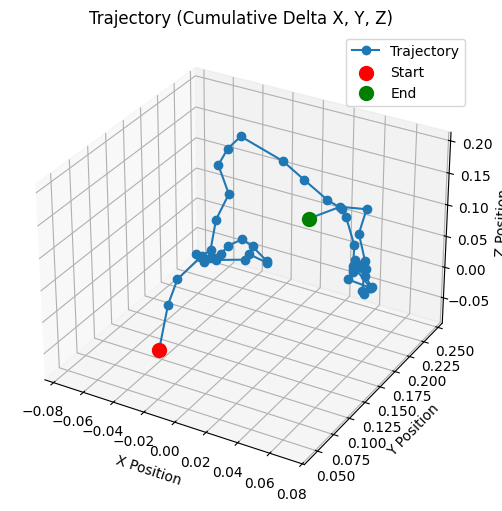

In [12]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # nee for 3d plotting

# Load the pickle file
with open('/content/traj1/policy_out.pkl', 'rb') as file:
    policy_out = pickle.load(file)

# Extract the delta values from the 'actions' array in each dictionary
delta_x, delta_y, delta_z = [], [], []
for entry in policy_out:
    actions = entry['actions']
    delta_x.append(actions[0])
    delta_y.append(actions[1])
    delta_z.append(actions[2])

# Converting the delta lists into numpy arrays
delta_x = np.array(delta_x)
delta_y = np.array(delta_y)
delta_z = np.array(delta_z)

# Computing the cumulative sum to get the actual positions
# Here, the starting point is assumed to be (0, 0, 0)
x = np.cumsum(delta_x)
y = np.cumsum(delta_y)
z = np.cumsum(delta_z)


# Create a 3D plot for the trajectory line
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot a continuous line for the trajectory and mark the individual points
ax.plot(x, y, z, marker='o', label='Trajectory')

# Marking the starting and ending points
ax.scatter(x[0], y[0], z[0], c='red', s=100, label='Start')
ax.scatter(x[-1], y[-1], z[-1], c='green', s=100, label='End')

# Label the axes and add a title
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('Trajectory (Cumulative Delta X, Y, Z)')

ax.legend()
plt.show()


In [16]:
import pickle
import plotly.graph_objects as go
import numpy as np

# Loading the pkl file
with open('/content/traj1/policy_out.pkl', 'rb') as file:
    policy_out = pickle.load(file)

# Extracting the delta values from the 'actions' array in each dictionary
delta_x, delta_y, delta_z = [], [], []
for entry in policy_out:
    actions = entry['actions']
    delta_x.append(actions[0])
    delta_y.append(actions[1])
    delta_z.append(actions[2])

# Converting the delta lists into numpy arrays and compute the cumulative sum to get positions
delta_x = np.array(delta_x)
delta_y = np.array(delta_y)
delta_z = np.array(delta_z)
x = np.cumsum(delta_x)
y = np.cumsum(delta_y)
z = np.cumsum(delta_z)

# Creat inga color gradient based on the number of points (progression over time)
colors = np.linspace(0, 1, len(x))

# Creat ingan interactive 3D plot with Plotly
fig = go.Figure()

# Adding the trajectory as a scatter plot with markers and lines
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers+lines',
    marker=dict(
        size=5,
        color=colors,
        colorscale='Viridis',
        colorbar=dict(title='Progression Over Time')
    ),
    line=dict(color='blue', width=2),
    name='Trajectory'
))

# Highlighting the starting point in red
fig.add_trace(go.Scatter3d(
    x=[x[0]], y=[y[0]], z=[z[0]],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Start'
))

# Highlighting the ending point in green
fig.add_trace(go.Scatter3d(
    x=[x[-1]], y=[y[-1]], z=[z[-1]],
    mode='markers',
    marker=dict(size=10, color='green'),
    name='End'
))

# Updating the layout with axis labels and a title
fig.update_layout(
    scene=dict(
        xaxis_title='X Position',
        yaxis_title='Y Position',
        zaxis_title='Z Position'
    ),
    title='Interactive Trajectory (Cumulative Delta X, Y, Z)'
)

# Displaying the interactive plot
fig.show()


In [24]:
import pickle
import plotly.graph_objects as go
import numpy as np

# Loading the pkl file
with open('/content/traj1/policy_out.pkl', 'rb') as file:
    policy_out = pickle.load(file)

# --- Compute Cumulative Positions from Delta Values ---
# Extracting the delta values (first three elements of each action)
delta_x, delta_y, delta_z = [], [], []
for entry in policy_out:
    actions = entry['actions']
    delta_x.append(actions[0])
    delta_y.append(actions[1])
    delta_z.append(actions[2])

# Converting the delta lists into numpy arrays and compute cumulative sums
delta_x = np.array(delta_x)
delta_y = np.array(delta_y)
delta_z = np.array(delta_z)
x = np.cumsum(delta_x)
y = np.cumsum(delta_y)
z = np.cumsum(delta_z)

# --- Detect Pick-Up and Release Events ---
# We assume the gripper value is at index 6: >=0.9 means open, else closed.
pickup_indices = []   # indices where gripper transitions from open to closed (pick-up)
release_indices = []  # indices where gripper transitions from closed to open (release)

prev_state = None
for i, entry in enumerate(policy_out):
    actions = entry['actions']
    gripper_val = actions[6]
    current_state = 'open' if gripper_val >= 0.9 else 'closed'

    if prev_state is not None:
        if prev_state == 'open' and current_state == 'closed':
            pickup_indices.append(i)
            print(f"Pick-up detected at index {i} (gripper value: {gripper_val:.3f})")
        elif prev_state == 'closed' and current_state == 'open':
            release_indices.append(i)
            print(f"Release detected at index {i} (gripper value: {gripper_val:.3f})")
    prev_state = current_state

# Getting cumulative positions for pickup and release events
pickup_positions = [(x[i], y[i], z[i]) for i in pickup_indices]
release_positions = [(x[i], y[i], z[i]) for i in release_indices]
#Interactive plot for the trajectory
# Create a color gradient based on the number of points (progression over time)
colors = np.linspace(0, 1, len(x))

fig = go.Figure()

# Adding the full trajectory as a scatter plot with markers and lines
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers+lines',
    marker=dict(
        size=5,
        color=colors,
        colorscale='Viridis',
        colorbar=dict(title='Progression Over Time')
    ),
    line=dict(color='blue', width=2),
    name='Trajectory'
))

# Highlighting the starting point in red
fig.add_trace(go.Scatter3d(
    x=[x[0]], y=[y[0]], z=[z[0]],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Start'
))

# Highlighting the ending point in green
fig.add_trace(go.Scatter3d(
    x=[x[-1]], y=[y[-1]], z=[z[-1]],
    mode='markers',
    marker=dict(size=10, color='green'),
    name='End'
))

# Adding pickup events (e.g., markers in orange)
if pickup_positions:
    pickup_x, pickup_y, pickup_z = zip(*pickup_positions)
    fig.add_trace(go.Scatter3d(
        x=list(pickup_x), y=list(pickup_y), z=list(pickup_z),
        mode='markers',
        marker=dict(size=8, color='orange'),
        name='Pick-up'
    ))

# Adding release events (e.g., markers in purple)
if release_positions:
    release_x, release_y, release_z = zip(*release_positions)
    fig.add_trace(go.Scatter3d(
        x=list(release_x), y=list(release_y), z=list(release_z),
        mode='markers',
        marker=dict(size=8, color='purple'),
        name='Release'
    ))

# Updating the layout with axis labels and a title
fig.update_layout(
    scene=dict(
        xaxis_title='X Position',
        yaxis_title='Y Position',
        zaxis_title='Z Position'
    ),
    title='Interactive Trajectory (Cumulative Delta X, Y, Z) with Pick-up & Release Events'
)

# Displaying the interactive plot
fig.show()


Pick-up detected at index 13 (gripper value: -0.005)
Release detected at index 43 (gripper value: 1.000)


In [25]:
import pickle
import plotly.graph_objects as go
import numpy as np

# Load the pickle file from traj1
with open('/content/traj1/policy_out.pkl', 'rb') as file:
    policy_out = pickle.load(file)

# --- Compute Cumulative Positions from Delta Values ---
# Extracting the delta values (first three elements of each action)
delta_x, delta_y, delta_z = [], [], []
for entry in policy_out:
    actions = entry['actions']
    delta_x.append(actions[0])
    delta_y.append(actions[1])
    delta_z.append(actions[2])

# Converting lists to numpy arrays and compute cumulative sums
delta_x = np.array(delta_x)
delta_y = np.array(delta_y)
delta_z = np.array(delta_z)
x = np.cumsum(delta_x)
y = np.cumsum(delta_y)
z = np.cumsum(delta_z)

# --- Detect Pick-Up and Release Events ---
# Assumption: gripper value is at index 6 in the actions array.
# A value >= 0.9 means "open", otherwise it's "closed".
pickup_indices = []   # indices where the gripper goes from open -> closed (object picked up)
release_indices = []  # indices where the gripper goes from closed -> open (object released)

prev_state = None
for i, entry in enumerate(policy_out):
    actions = entry['actions']
    gripper_val = actions[6]
    current_state = 'open' if gripper_val >= 0.9 else 'closed'

    if prev_state is not None:
        if prev_state == 'open' and current_state == 'closed':
            pickup_indices.append(i)
            print(f"Pick-up detected at index {i}: ({x[i]:.3f}, {y[i]:.3f}, {z[i]:.3f})")
        elif prev_state == 'closed' and current_state == 'open':
            release_indices.append(i)
            print(f"Release detected at index {i}: ({x[i]:.3f}, {y[i]:.3f}, {z[i]:.3f})")
    prev_state = current_state

# Get cumulative positions for pickup and release events
pickup_positions = [(x[i], y[i], z[i]) for i in pickup_indices]
release_positions = [(x[i], y[i], z[i]) for i in release_indices]

# --- Create Interactive 3D Plot with Plotly ---
# Create a color gradient for the overall trajectory
colors = np.linspace(0, 1, len(x))

fig = go.Figure()

# Add the full trajectory (with a color gradient)
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers+lines',
    marker=dict(
        size=5,
        color=colors,
        colorscale='Viridis',
        colorbar=dict(title='Progression Over Time')
    ),
    line=dict(color='blue', width=2),
    name='Trajectory'
))

# Marking the start and end points
fig.add_trace(go.Scatter3d(
    x=[x[0]], y=[y[0]], z=[z[0]],
    mode='markers+text',
    marker=dict(size=10, color='red'),
    text=['Start'],
    textposition='top center',
    name='Start'
))
fig.add_trace(go.Scatter3d(
    x=[x[-1]], y=[y[-1]], z=[z[-1]],
    mode='markers+text',
    marker=dict(size=10, color='green'),
    text=['End'],
    textposition='top center',
    name='End'
))

# Adding the pick-up events with text labels
if pickup_positions:
    pickup_x, pickup_y, pickup_z = zip(*pickup_positions)
    # Create a label string for each pickup event showing the coordinates
    pickup_text = [f'Pickup ({round(px,2)}, {round(py,2)}, {round(pz,2)})'
                   for px, py, pz in pickup_positions]
    fig.add_trace(go.Scatter3d(
        x=list(pickup_x), y=list(pickup_y), z=list(pickup_z),
        mode='markers+text',
        marker=dict(size=8, color='orange'),
        text=pickup_text,
        textposition='top center',
        name='Pick-up'
    ))

# Adding release events with text labels
if release_positions:
    release_x, release_y, release_z = zip(*release_positions)
    release_text = [f'Release ({round(rx,2)}, {round(ry,2)}, {round(rz,2)})'
                    for rx, ry, rz in release_positions]
    fig.add_trace(go.Scatter3d(
        x=list(release_x), y=list(release_y), z=list(release_z),
        mode='markers+text',
        marker=dict(size=8, color='purple'),
        text=release_text,
        textposition='top center',
        name='Release'
    ))

# Updating the layout with axis labels and a title
fig.update_layout(
    scene=dict(
        xaxis_title='X Position',
        yaxis_title='Y Position',
        zaxis_title='Z Position'
    ),
    title='Interactive Trajectory with Pick-up and Release Labels'
)

# Displaying the interactive plot
fig.show()


Pick-up detected at index 13: (-0.062, 0.225, -0.056)
Release detected at index 43: (0.056, 0.183, 0.012)


In [26]:
import pickle
import plotly.graph_objects as go
import numpy as np

# Loading the pkl file
with open('/content/traj1/policy_out.pkl', 'rb') as file:
    policy_out = pickle.load(file)

# --- Compute Cumulative Positions from Delta Values ---
# Extracting the delta values (first three elements of each action)
delta_x, delta_y, delta_z = [], [], []
for entry in policy_out:
    actions = entry['actions']
    delta_x.append(actions[0])
    delta_y.append(actions[1])
    delta_z.append(actions[2])

# Converting the delta lists into numpy arrays and compute cumulative sums
delta_x = np.array(delta_x)
delta_y = np.array(delta_y)
delta_z = np.array(delta_z)
x = np.cumsum(delta_x)
y = np.cumsum(delta_y)
z = np.cumsum(delta_z)

# --- Detecting the Pick-Up and Release Events ---
# We assume the gripper value is at index 6: >=0.9 means open, else closed.
pickup_indices = []   # indices where gripper transitions from open to closed (pick-up)
release_indices = []  # indices where gripper transitions from closed to open (release)

prev_state = None
for i, entry in enumerate(policy_out):
    actions = entry['actions']
    gripper_val = actions[6]
    current_state = 'open' if gripper_val >= 0.9 else 'closed'

    if prev_state is not None:
        if prev_state == 'open' and current_state == 'closed':
            pickup_indices.append(i)
            print(f"Pick-up detected at index {i} (gripper value: {gripper_val:.3f})")
        elif prev_state == 'closed' and current_state == 'open':
            release_indices.append(i)
            print(f"Release detected at index {i} (gripper value: {gripper_val:.3f})")
    prev_state = current_state

# Getting the cumulative positions for pickup and release events
pickup_positions = [(x[i], y[i], z[i]) for i in pickup_indices]
release_positions = [(x[i], y[i], z[i]) for i in release_indices]

# --- Create an Interactive 3D Plot with Plotly ---
# Creating a color gradient based on the number of points (progression over time)
colors = np.linspace(0, 1, len(x))

fig = go.Figure()

# Adding the full trajectory as a scatter plot with markers and lines
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers+lines',
    marker=dict(
        size=5,
        color=colors,
        colorscale='Viridis',
        colorbar=dict(title='Progression Over Time')
    ),
    line=dict(color='blue', width=2),
    name='Trajectory'
))

# Highlighting the starting point in red
fig.add_trace(go.Scatter3d(
    x=[x[0]], y=[y[0]], z=[z[0]],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Start'
))

# Highlighting the ending point in green
fig.add_trace(go.Scatter3d(
    x=[x[-1]], y=[y[-1]], z=[z[-1]],
    mode='markers',
    marker=dict(size=10, color='green'),
    name='End'
))

# Adding pickup events (e.g., markers in orange)
if pickup_positions:
    pickup_x, pickup_y, pickup_z = zip(*pickup_positions)
    fig.add_trace(go.Scatter3d(
        x=list(pickup_x), y=list(pickup_y), z=list(pickup_z),
        mode='markers',
        marker=dict(size=8, color='orange'),
        name='Pick-up'
    ))

# Adding release events (e.g., markers in purple)
if release_positions:
    release_x, release_y, release_z = zip(*release_positions)
    fig.add_trace(go.Scatter3d(
        x=list(release_x), y=list(release_y), z=list(release_z),
        mode='markers',
        marker=dict(size=8, color='purple'),
        name='Release'
    ))

# Update layout with axis labels and a title
# The key here is xaxis=dict(autorange='reversed') to flip the X-axis
fig.update_layout(
    scene=dict(
        xaxis=dict(title='X Position', autorange='reversed'),
        yaxis=dict(title='Y Position'),
        zaxis=dict(title='Z Position')
    ),
    title='Interactive Trajectory (Start on the Left) with Pick-up & Release Events'
)

# Display the interactive plot
fig.show()


Pick-up detected at index 13 (gripper value: -0.005)
Release detected at index 43 (gripper value: 1.000)


In [31]:
import pickle
import numpy as np
from scipy.spatial.transform import Rotation as R

# Load the obs_dict file which contains the end-effector transforms
with open('/content/traj1/obs_dict.pkl', 'rb') as file:
    obs_dict = pickle.load(file)

# Print the shape of the eef_transform to verify its structure
eef_transform = obs_dict['eef_transform']
print("eef_transform shape:", eef_transform.shape)  # Expect something like (50, 4)

# Assume that each row in eef_transform is a quaternion [x, y, z, w].
# We can take the first quaternion as the representative reference frame.
first_quat = eef_transform[0]
print("First quaternion:", first_quat)

# Convert the quaternion to Euler angles (roll, pitch, yaw) in degrees.
euler_angles = R.from_quat(first_quat).as_euler('xyz', degrees=True)
print("Reference frame (Euler angles):", euler_angles)


eef_transform shape: (50, 4, 4)
First quaternion: [[-0.07499286  0.00864171  0.99714663  0.31416547]
 [ 0.00413435  0.99995655 -0.00835513 -0.02339584]
 [-0.9971755   0.00349598 -0.07502532  0.06205847]
 [ 0.          0.          0.          1.        ]]
Reference frame (Euler angles): [[  -1.5744678     8.10945125  144.9128088 ]
 [-179.03095651   -2.67639953  179.50358233]
 [-172.80742957   -8.54699361   -0.9399125 ]
 [   0.            0.            0.        ]]


In [36]:
import pickle
import numpy as np
from scipy.spatial.transform import Rotation as R

# Load obs_dict.pkl which contains the end-effector transforms.
with open('/content/traj1/obs_dict.pkl', 'rb') as file:
    obs_dict = pickle.load(file)

# eef_transform is assumed to have shape (50, 4, 4)
eef_transform = obs_dict['eef_transform']
print("eef_transform shape:", eef_transform.shape)

# Extract the first transformation matrix (4x4)
first_transform = eef_transform[0]
print("First transformation matrix:")
print(first_transform)

# Extract the rotation matrix (upper-left 3x3)
R_mat = first_transform[:3, :3]
print("Extracted rotation matrix (3x3):")
print(R_mat)

# Convert the rotation matrix to Euler angles using the 'xyz' convention in degrees.
euler_angles = R.from_matrix(R_mat).as_euler('xyz', degrees=True)
print("Reference frame (Euler angles):")
print(f"Roll: {euler_angles[0]:.1f}°, Pitch: {euler_angles[1]:.1f}°, Yaw: {euler_angles[2]:.1f}°")


eef_transform shape: (50, 4, 4)
First transformation matrix:
[[-0.07499286  0.00864171  0.99714663  0.31416547]
 [ 0.00413435  0.99995655 -0.00835513 -0.02339584]
 [-0.9971755   0.00349598 -0.07502532  0.06205847]
 [ 0.          0.          0.          1.        ]]
Extracted rotation matrix (3x3):
[[-0.07499286  0.00864171  0.99714663]
 [ 0.00413435  0.99995655 -0.00835513]
 [-0.9971755   0.00349598 -0.07502532]]
Reference frame (Euler angles):
Roll: 177.3°, Pitch: 85.7°, Yaw: 176.8°


In [40]:
import pickle
import plotly.graph_objects as go
import numpy as np
from scipy.spatial.transform import Rotation as R

# ---------------------------
# Part 1: Load and Process Trajectory Data
# ---------------------------
with open('/content/traj1/policy_out.pkl', 'rb') as file:
    policy_out = pickle.load(file)

# Extract the delta values (first three elements of each action)
delta_x, delta_y, delta_z = [], [], []
for entry in policy_out:
    actions = entry['actions']
    delta_x.append(actions[0])
    delta_y.append(actions[1])
    delta_z.append(actions[2])

# Compute cumulative positions
delta_x = np.array(delta_x)
delta_y = np.array(delta_y)
delta_z = np.array(delta_z)
x = np.cumsum(delta_x)
y = np.cumsum(delta_y)
z = np.cumsum(delta_z)

# ---------------------------
# Part 2: Detect Pick-up and Release Events
# ---------------------------
# Assumption: gripper value is at index 6: >= 0.9 means "open", else "closed".
pickup_indices = []   # open -> closed transition (object picked up)
release_indices = []  # closed -> open transition (object released)
prev_state = None
for i, entry in enumerate(policy_out):
    actions = entry['actions']
    gripper_val = actions[6]
    current_state = 'open' if gripper_val >= 0.9 else 'closed'

    if prev_state is not None:
        if prev_state == 'open' and current_state == 'closed':
            pickup_indices.append(i)
            print(f"Pick-up detected at index {i} (gripper value: {gripper_val:.3f})")
        elif prev_state == 'closed' and current_state == 'open':
            release_indices.append(i)
            print(f"Release detected at index {i} (gripper value: {gripper_val:.3f})")
    prev_state = current_state

pickup_positions = [(x[i], y[i], z[i]) for i in pickup_indices]
release_positions = [(x[i], y[i], z[i]) for i in release_indices]

# ---------------------------
# Part 3: Compute Reference Frame (Euler Angles) from obs_dict.pkl
# ---------------------------
# We assume obs_dict.pkl contains the end-effector transforms as 4x4 matrices.
with open('/content/traj1/obs_dict.pkl', 'rb') as file:
    obs_dict = pickle.load(file)

# Use the first transformation matrix as representative
first_transform = obs_dict['eef_transform'][0]  # shape (4,4)
R_mat = first_transform[:3, :3]  # extract the rotation matrix (3x3)
euler_angles = R.from_matrix(R_mat).as_euler('xyz', degrees=True)
euler_text = f"Euler: Roll {euler_angles[0]:.1f}°, Pitch {euler_angles[1]:.1f}°, Yaw {euler_angles[2]:.1f}°"
print(euler_text)

# ---------------------------
# Part 4: Create the Interactive 3D Plot with Reference Frame
# ---------------------------
# Create a color gradient for the trajectory
colors = np.linspace(0, 1, len(x))
fig = go.Figure()

# Plot the full trajectory
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers+lines',
    marker=dict(
        size=5,
        color=colors,
        colorscale='Viridis',
        colorbar=dict(title='Progression Over Time')
    ),
    line=dict(color='blue', width=2),
    name='Trajectory'
))

# Mark start and end points
fig.add_trace(go.Scatter3d(
    x=[x[0]], y=[y[0]], z=[z[0]],
    mode='markers+text',
    marker=dict(size=10, color='red'),
    text=['Start'],
    textposition='top center',
    name='Start'
))
fig.add_trace(go.Scatter3d(
    x=[x[-1]], y=[y[-1]], z=[z[-1]],
    mode='markers+text',
    marker=dict(size=10, color='green'),
    text=['End'],
    textposition='top center',
    name='End'
))

# Plot pick-up events (orange) and release events (purple)
if pickup_positions:
    pickup_x, pickup_y, pickup_z = zip(*pickup_positions)
    pickup_text = [f'Pickup ({round(px,2)}, {round(py,2)}, {round(pz,2)})' for px, py, pz in pickup_positions]
    fig.add_trace(go.Scatter3d(
        x=list(pickup_x), y=list(pickup_y), z=list(pickup_z),
        mode='markers+text',
        marker=dict(size=8, color='orange'),
        text=pickup_text,
        textposition='top center',
        name='Pick-up'
    ))
if release_positions:
    release_x, release_y, release_z = zip(*release_positions)
    release_text = [f'Release ({round(rx,2)}, {round(ry,2)}, {round(rz,2)})' for rx, ry, rz in release_positions]
    fig.add_trace(go.Scatter3d(
        x=list(release_x), y=list(release_y), z=list(release_z),
        mode='markers+text',
        marker=dict(size=8, color='purple'),
        text=release_text,
        textposition='top center',
        name='Release'
    ))

# --- Add Reference Frame Axes at the Start Position ---
# We'll draw arrows representing the X, Y, and Z axes of the end-effector.
scale = 0.2  # Adjust this scale factor as needed
start_point = (x[0], y[0], z[0])
# The columns of the rotation matrix R_mat represent the directions of the x, y, z axes.
x_axis_end = (start_point[0] + scale * R_mat[0, 0],
              start_point[1] + scale * R_mat[1, 0],
              start_point[2] + scale * R_mat[2, 0])
y_axis_end = (start_point[0] + scale * R_mat[0, 1],
              start_point[1] + scale * R_mat[1, 1],
              start_point[2] + scale * R_mat[2, 1])
z_axis_end = (start_point[0] + scale * R_mat[0, 2],
              start_point[1] + scale * R_mat[1, 2],
              start_point[2] + scale * R_mat[2, 2])

# X-axis in red
fig.add_trace(go.Scatter3d(
    x=[start_point[0], x_axis_end[0]],
    y=[start_point[1], x_axis_end[1]],
    z=[start_point[2], x_axis_end[2]],
    mode='lines+markers+text',
    marker=dict(size=4, color='red'),
    line=dict(color='red', width=4),
    text=['X', ''],
    textposition='top center',
    name='Ref X'
))
# Y-axis in green
fig.add_trace(go.Scatter3d(
    x=[start_point[0], y_axis_end[0]],
    y=[start_point[1], y_axis_end[1]],
    z=[start_point[2], y_axis_end[2]],
    mode='lines+markers+text',
    marker=dict(size=4, color='green'),
    line=dict(color='green', width=4),
    text=['Y', ''],
    textposition='top center',
    name='Ref Y'
))
# Z-axis in blue
fig.add_trace(go.Scatter3d(
    x=[start_point[0], z_axis_end[0]],
    y=[start_point[1], z_axis_end[1]],
    z=[start_point[2], z_axis_end[2]],
    mode='lines+markers+text',
    marker=dict(size=4, color='blue'),
    line=dict(color='blue', width=4),
    text=['Z', ''],
    textposition='top center',
    name='Ref Z'
))

# Optionally, add a text annotation for the Euler angles near the start point.
# (Note: 3D annotations are limited in Plotly; this will appear as an overlay.)
fig.add_annotation(
    x=start_point[0],
    y=start_point[1],
    text=euler_text,
    showarrow=True,
    arrowhead=2,
    ax=20, ay=-40,
    font=dict(color="black", size=12)
)

# Update layout: flip the X-axis so the start appears on the left
fig.update_layout(
    scene=dict(
        xaxis=dict(title='X Position', autorange='reversed'),
        yaxis=dict(title='Y Position'),
        zaxis=dict(title='Z Position')
    ),
    title='Interactive Trajectory with Pick-up/Release and Reference Frame'
)

fig.show()


Pick-up detected at index 13 (gripper value: -0.005)
Release detected at index 43 (gripper value: 1.000)
Euler: Roll 177.3°, Pitch 85.7°, Yaw 176.8°


In [42]:
import pickle
import plotly.graph_objects as go
import numpy as np
from scipy.spatial.transform import Rotation as R

# ---------------------------
# Part 1: Load and Process Trajectory Data (from policy_out.pkl)
# ---------------------------
with open('/content/traj1/policy_out.pkl', 'rb') as file:
    policy_out = pickle.load(file)

# Extract the delta values (first three elements of each action)
delta_x, delta_y, delta_z = [], [], []
for entry in policy_out:
    actions = entry['actions']
    delta_x.append(actions[0])
    delta_y.append(actions[1])
    delta_z.append(actions[2])

# Compute cumulative positions
delta_x = np.array(delta_x)
delta_y = np.array(delta_y)
delta_z = np.array(delta_z)
x = np.cumsum(delta_x)
y = np.cumsum(delta_y)
z = np.cumsum(delta_z)

# ---------------------------
# Part 2: Detect Pick-up and Release Events
# ---------------------------
# Assumption: gripper value is at index 6: >= 0.9 means "open", else "closed".
pickup_indices = []   # open -> closed transition (object picked up)
release_indices = []  # closed -> open transition (object released)
prev_state = None
for i, entry in enumerate(policy_out):
    actions = entry['actions']
    gripper_val = actions[6]
    current_state = 'open' if gripper_val >= 0.9 else 'closed'

    if prev_state is not None:
        if prev_state == 'open' and current_state == 'closed':
            pickup_indices.append(i)
            print(f"Pick-up detected at index {i} (gripper value: {gripper_val:.3f})")
        elif prev_state == 'closed' and current_state == 'open':
            release_indices.append(i)
            print(f"Release detected at index {i} (gripper value: {gripper_val:.3f})")
    prev_state = current_state

pickup_positions = [(x[i], y[i], z[i]) for i in pickup_indices]
release_positions = [(x[i], y[i], z[i]) for i in release_indices]

# ---------------------------
# Part 3: Compute Reference Frame and End-Effector Poses from obs_dict.pkl
# ---------------------------
with open('/content/traj1/obs_dict.pkl', 'rb') as file:
    obs_dict = pickle.load(file)

# Use the first transformation matrix as representative to compute the reference frame.
first_transform = obs_dict['eef_transform'][0]  # shape (4,4)
R_mat = first_transform[:3, :3]  # extract the rotation matrix (3x3)
euler_angles = R.from_matrix(R_mat).as_euler('xyz', degrees=True)
euler_text = f"Euler: Roll {euler_angles[0]:.1f}°, Pitch {euler_angles[1]:.1f}°, Yaw {euler_angles[2]:.1f}°"
print(euler_text)

# Also extract the end-effector positions from all transformation matrices.
eef_positions = []
for T in obs_dict['eef_transform']:
    pos = T[:3, 3]
    eef_positions.append(pos)
eef_positions = np.array(eef_positions)
eef_x = eef_positions[:, 0]
eef_y = eef_positions[:, 1]
eef_z = eef_positions[:, 2]

# ---------------------------
# Part 4: Create the Interactive 3D Plot with Reference Frame and End-Effector Poses
# ---------------------------
# Create a color gradient for the trajectory
colors = np.linspace(0, 1, len(x))
fig = go.Figure()

# Plot the full trajectory from policy_out deltas
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers+lines',
    marker=dict(
        size=5,
        color=colors,
        colorscale='Viridis',
        colorbar=dict(title='Progression Over Time')
    ),
    line=dict(color='blue', width=2),
    name='Trajectory'
))

# Plot the start and end points of the trajectory
fig.add_trace(go.Scatter3d(
    x=[x[0]], y=[y[0]], z=[z[0]],
    mode='markers+text',
    marker=dict(size=10, color='red'),
    text=['Start'],
    textposition='top center',
    name='Start'
))
fig.add_trace(go.Scatter3d(
    x=[x[-1]], y=[y[-1]], z=[z[-1]],
    mode='markers+text',
    marker=dict(size=10, color='green'),
    text=['End'],
    textposition='top center',
    name='End'
))

# Plot pick-up events (orange) and release events (purple)
if pickup_positions:
    pickup_x, pickup_y, pickup_z = zip(*pickup_positions)
    pickup_text = [f'Pickup ({round(px,2)}, {round(py,2)}, {round(pz,2)})' for px, py, pz in pickup_positions]
    fig.add_trace(go.Scatter3d(
        x=list(pickup_x), y=list(pickup_y), z=list(pickup_z),
        mode='markers+text',
        marker=dict(size=8, color='orange'),
        text=pickup_text,
        textposition='top center',
        name='Pick-up'
    ))
if release_positions:
    release_x, release_y, release_z = zip(*release_positions)
    release_text = [f'Release ({round(rx,2)}, {round(ry,2)}, {round(rz,2)})' for rx, ry, rz in release_positions]
    fig.add_trace(go.Scatter3d(
        x=list(release_x), y=list(release_y), z=list(release_z),
        mode='markers+text',
        marker=dict(size=8, color='purple'),
        text=release_text,
        textposition='top center',
        name='Release'
    ))

# Plot the end-effector poses from each image (extracted from obs_dict)
fig.add_trace(go.Scatter3d(
    x=eef_x, y=eef_y, z=eef_z,
    mode='markers+lines',
    marker=dict(size=6, color='magenta'),
    line=dict(color='magenta', width=2),
    name='EEF Pose'
))

# --- Add Reference Frame Axes at the Start Position ---
# Draw arrows representing the X, Y, and Z axes of the end-effector.
scale = 0.2  # Adjust scale as needed
start_point = (x[0], y[0], z[0])
# Use the previously extracted rotation matrix R_mat from the first transform.
x_axis_end = (start_point[0] + scale * R_mat[0, 0],
              start_point[1] + scale * R_mat[1, 0],
              start_point[2] + scale * R_mat[2, 0])
y_axis_end = (start_point[0] + scale * R_mat[0, 1],
              start_point[1] + scale * R_mat[1, 1],
              start_point[2] + scale * R_mat[2, 1])
z_axis_end = (start_point[0] + scale * R_mat[0, 2],
              start_point[1] + scale * R_mat[1, 2],
              start_point[2] + scale * R_mat[2, 2])

# X-axis in red
fig.add_trace(go.Scatter3d(
    x=[start_point[0], x_axis_end[0]],
    y=[start_point[1], x_axis_end[1]],
    z=[start_point[2], x_axis_end[2]],
    mode='lines+markers+text',
    marker=dict(size=4, color='red'),
    line=dict(color='red', width=4),
    text=['X', ''],
    textposition='top center',
    name='Ref X'
))
# Y-axis in green
fig.add_trace(go.Scatter3d(
    x=[start_point[0], y_axis_end[0]],
    y=[start_point[1], y_axis_end[1]],
    z=[start_point[2], y_axis_end[2]],
    mode='lines+markers+text',
    marker=dict(size=4, color='green'),
    line=dict(color='green', width=4),
    text=['Y', ''],
    textposition='top center',
    name='Ref Y'
))
# Z-axis in blue
fig.add_trace(go.Scatter3d(
    x=[start_point[0], z_axis_end[0]],
    y=[start_point[1], z_axis_end[1]],
    z=[start_point[2], z_axis_end[2]],
    mode='lines+markers+text',
    marker=dict(size=4, color='blue'),
    line=dict(color='blue', width=4),
    text=['Z', ''],
    textposition='top center',
    name='Ref Z'
))

# Optionally, add a text annotation for the Euler angles near the start point.
fig.add_annotation(
    x=start_point[0],
    y=start_point[1],
    text=euler_text,
    showarrow=True,
    arrowhead=2,
    ax=20, ay=-40,
    font=dict(color="black", size=12)
)

# Update layout: flip the X-axis so the start appears on the left
fig.update_layout(
    scene=dict(
        xaxis=dict(title='X Position', autorange='reversed'),
        yaxis=dict(title='Y Position'),
        zaxis=dict(title='Z Position')
    ),
    title='Interactive Trajectory with EEF Poses, Pick-up/Release and Reference Frame'
)

fig.show()


Pick-up detected at index 13 (gripper value: -0.005)
Release detected at index 43 (gripper value: 1.000)
Euler: Roll 177.3°, Pitch 85.7°, Yaw 176.8°


Rotation: The upperleft 3*×*3 submatrix describes the orientation of the robots endeffector relative to a reference frame (typically the robots base or the world frame).

Translation: The first three elements of the last column give the position (x, y, z) of the end‑effector.



In [43]:
import pickle
import plotly.graph_objects as go
import numpy as np
from scipy.spatial.transform import Rotation as R

# -------------------------------------------------
# 1. Load your obs_dict, which contains eef_transform
# -------------------------------------------------
with open('/content/traj1/obs_dict.pkl', 'rb') as file:
    obs_dict = pickle.load(file)

eef_transform = obs_dict['eef_transform']  # shape: (N, 4, 4)
print("Number of transforms:", len(eef_transform))

# -------------------------------------------------
# 2. Build Scatter3D traces for each axis (X, Y, Z)
# -------------------------------------------------
# We'll create one set of lines for the X-axes, one for the Y-axes, and one for the Z-axes.
# Each transform contributes a pair of points (start -> end) for each axis, plus a None
# separator to break the line in Plotly.

scale = 0.05  # Scale for axis length (adjust to your liking)

# Lists to store X, Y, Z coordinates for the X-axis lines
x_xaxis = []
y_xaxis = []
z_xaxis = []

# Same for Y-axis
x_yaxis = []
y_yaxis = []
z_yaxis = []

# Same for Z-axis
x_zaxis = []
y_zaxis = []
z_zaxis = []

for T in eef_transform:
    # Translation vector (position of the end effector)
    t = T[:3, 3]

    # Rotation matrix
    R_mat = T[:3, :3]

    # The columns of R_mat are the directions of the local X, Y, Z axes in the world frame
    # X-axis line: from t -> t + scale*R_mat[:,0]
    x_xaxis += [t[0], t[0] + scale * R_mat[0, 0], None]
    y_xaxis += [t[1], t[1] + scale * R_mat[1, 0], None]
    z_xaxis += [t[2], t[2] + scale * R_mat[2, 0], None]

    # Y-axis line: from t -> t + scale*R_mat[:,1]
    x_yaxis += [t[0], t[0] + scale * R_mat[0, 1], None]
    y_yaxis += [t[1], t[1] + scale * R_mat[1, 1], None]
    z_yaxis += [t[2], t[2] + scale * R_mat[2, 1], None]

    # Z-axis line: from t -> t + scale*R_mat[:,2]
    x_zaxis += [t[0], t[0] + scale * R_mat[0, 2], None]
    y_zaxis += [t[1], t[1] + scale * R_mat[1, 2], None]
    z_zaxis += [t[2], t[2] + scale * R_mat[2, 2], None]

# -------------------------------------------------
# 3. Create Plotly figure and add the axis traces
# -------------------------------------------------
fig = go.Figure()

# X-axis lines (in red)
fig.add_trace(go.Scatter3d(
    x=x_xaxis, y=y_xaxis, z=z_xaxis,
    mode='lines',
    line=dict(color='red', width=4),
    name='X-axis'
))

# Y-axis lines (in green)
fig.add_trace(go.Scatter3d(
    x=x_yaxis, y=y_yaxis, z=z_yaxis,
    mode='lines',
    line=dict(color='green', width=4),
    name='Y-axis'
))

# Z-axis lines (in blue)
fig.add_trace(go.Scatter3d(
    x=x_zaxis, y=y_zaxis, z=z_zaxis,
    mode='lines',
    line=dict(color='blue', width=4),
    name='Z-axis'
))

# Optionally, also plot the end-effector positions themselves as points
eef_positions = eef_transform[:, :3, 3]  # shape (N, 3)
fig.add_trace(go.Scatter3d(
    x=eef_positions[:, 0],
    y=eef_positions[:, 1],
    z=eef_positions[:, 2],
    mode='markers',
    marker=dict(size=4, color='magenta'),
    name='EEF positions'
))

# Configure the layout
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    title='Forest of EEF Frames from obs_dict'
)

fig.show()


Number of transforms: 50


In [44]:
import pickle
import plotly.graph_objects as go
import numpy as np
from scipy.spatial.transform import Rotation as R

# ---------------------------
# Part 1: Load and Process Trajectory Data from policy_out.pkl
# ---------------------------
with open('/content/traj1/policy_out.pkl', 'rb') as file:
    policy_out = pickle.load(file)

# Extract the delta values (first three elements of each action)
delta_x, delta_y, delta_z = [], [], []
for entry in policy_out:
    actions = entry['actions']
    delta_x.append(actions[0])
    delta_y.append(actions[1])
    delta_z.append(actions[2])

# Compute cumulative positions
delta_x = np.array(delta_x)
delta_y = np.array(delta_y)
delta_z = np.array(delta_z)
x = np.cumsum(delta_x)
y = np.cumsum(delta_y)
z = np.cumsum(delta_z)

# ---------------------------
# Part 2: Detect Pick-up and Release Events
# ---------------------------
# Assumption: gripper value is at index 6: >= 0.9 means "open", else "closed".
pickup_indices = []   # open -> closed transition (object picked up)
release_indices = []  # closed -> open transition (object released)
prev_state = None
for i, entry in enumerate(policy_out):
    actions = entry['actions']
    gripper_val = actions[6]
    current_state = 'open' if gripper_val >= 0.9 else 'closed'

    if prev_state is not None:
        if prev_state == 'open' and current_state == 'closed':
            pickup_indices.append(i)
            print(f"Pick-up detected at index {i}: ({x[i]:.3f}, {y[i]:.3f}, {z[i]:.3f})")
        elif prev_state == 'closed' and current_state == 'open':
            release_indices.append(i)
            print(f"Release detected at index {i}: ({x[i]:.3f}, {y[i]:.3f}, {z[i]:.3f})")
    prev_state = current_state

pickup_positions = [(x[i], y[i], z[i]) for i in pickup_indices]
release_positions = [(x[i], y[i], z[i]) for i in release_indices]

# ---------------------------
# Part 3: Load and Process End-Effector Transforms from obs_dict.pkl
# ---------------------------
with open('/content/traj1/obs_dict.pkl', 'rb') as file:
    obs_dict = pickle.load(file)

eef_transform = obs_dict['eef_transform']  # Expected shape: (N, 4, 4)
N = eef_transform.shape[0]
# Extract end-effector positions (translation part)
eef_positions = np.array([T[:3, 3] for T in eef_transform])
eef_x = eef_positions[:, 0]
eef_y = eef_positions[:, 1]
eef_z = eef_positions[:, 2]

# Compute a reference frame from the first transform:
first_transform = eef_transform[0]  # shape (4,4)
R_mat = first_transform[:3, :3]       # extract the rotation matrix (3x3)
euler_angles = R.from_matrix(R_mat).as_euler('xyz', degrees=True)
euler_text = f"Euler: Roll {euler_angles[0]:.1f}°, Pitch {euler_angles[1]:.1f}°, Yaw {euler_angles[2]:.1f}°"
print(euler_text)

# ---------------------------
# Part 4: Create the Interactive 3D Plot
# ---------------------------
fig = go.Figure()

# 4a. Plot the cumulative trajectory from policy_out (colored line)
colors = np.linspace(0, 1, len(x))
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers+lines',
    marker=dict(
        size=5,
        color=colors,
        colorscale='Viridis',
        colorbar=dict(title='Progression Over Time')
    ),
    line=dict(color='blue', width=2),
    name='Trajectory'
))

# 4b. Mark the start and end points with labels
fig.add_trace(go.Scatter3d(
    x=[x[0]], y=[y[0]], z=[z[0]],
    mode='markers+text',
    marker=dict(size=10, color='red'),
    text=['Start'],
    textposition='top center',
    name='Start'
))
fig.add_trace(go.Scatter3d(
    x=[x[-1]], y=[y[-1]], z=[z[-1]],
    mode='markers+text',
    marker=dict(size=10, color='green'),
    text=['End'],
    textposition='top center',
    name='End'
))

# 4c. Plot pick-up events (orange) with labels
if pickup_positions:
    pickup_x, pickup_y, pickup_z = zip(*pickup_positions)
    pickup_text = [f'Pickup ({round(px,2)}, {round(py,2)}, {round(pz,2)})' for px, py, pz in pickup_positions]
    fig.add_trace(go.Scatter3d(
        x=list(pickup_x), y=list(pickup_y), z=list(pickup_z),
        mode='markers+text',
        marker=dict(size=8, color='orange'),
        text=pickup_text,
        textposition='top center',
        name='Pickup'
    ))

# 4d. Plot release events (purple) with labels
if release_positions:
    release_x, release_y, release_z = zip(*release_positions)
    release_text = [f'Release ({round(rx,2)}, {round(ry,2)}, {round(rz,2)})' for rx, ry, rz in release_positions]
    fig.add_trace(go.Scatter3d(
        x=list(release_x), y=list(release_y), z=list(release_z),
        mode='markers+text',
        marker=dict(size=8, color='purple'),
        text=release_text,
        textposition='top center',
        name='Release'
    ))

# 4e. Plot the forest of EEF frames from obs_dict (local coordinate axes)
scale = 0.05  # Adjust this scale factor as needed for axis length
# Lists to hold coordinates for each axis trace
x_xaxis, y_xaxis, z_xaxis = [], [], []
x_yaxis, y_yaxis, z_yaxis = [], [], []
x_zaxis, y_zaxis, z_zaxis = [], [], []

for T in eef_transform:
    t = T[:3, 3]     # translation (position)
    R_mat = T[:3, :3]  # rotation matrix
    # X-axis line (red): from t to t + scale * R_mat[:,0]
    x_xaxis += [t[0], t[0] + scale * R_mat[0, 0], None]
    y_xaxis += [t[1], t[1] + scale * R_mat[1, 0], None]
    z_xaxis += [t[2], t[2] + scale * R_mat[2, 0], None]
    # Y-axis line (green): from t to t + scale * R_mat[:,1]
    x_yaxis += [t[0], t[0] + scale * R_mat[0, 1], None]
    y_yaxis += [t[1], t[1] + scale * R_mat[1, 1], None]
    z_yaxis += [t[2], t[2] + scale * R_mat[2, 1], None]
    # Z-axis line (blue): from t to t + scale * R_mat[:,2]
    x_zaxis += [t[0], t[0] + scale * R_mat[0, 2], None]
    y_zaxis += [t[1], t[1] + scale * R_mat[1, 2], None]
    z_zaxis += [t[2], t[2] + scale * R_mat[2, 2], None]

# Plot the EEF axes as lines
fig.add_trace(go.Scatter3d(
    x=x_xaxis, y=y_xaxis, z=z_xaxis,
    mode='lines',
    line=dict(color='red', width=2),
    name='EEF X-axis'
))
fig.add_trace(go.Scatter3d(
    x=x_yaxis, y=y_yaxis, z=z_yaxis,
    mode='lines',
    line=dict(color='green', width=2),
    name='EEF Y-axis'
))
fig.add_trace(go.Scatter3d(
    x=x_zaxis, y=y_zaxis, z=z_zaxis,
    mode='lines',
    line=dict(color='blue', width=2),
    name='EEF Z-axis'
))

# Optionally, also plot the end-effector positions as markers (magenta)
fig.add_trace(go.Scatter3d(
    x=eef_x, y=eef_y, z=eef_z,
    mode='markers',
    marker=dict(size=4, color='magenta'),
    name='EEF Pos'
))

# 4f. Add an annotation for the reference frame (Euler angles) near the start
fig.add_annotation(
    x=x[0],
    y=y[0],
    text=euler_text,
    showarrow=True,
    arrowhead=2,
    ax=20, ay=-40,
    font=dict(color="black", size=12)
)

# Reverse the X-axis so that the start appears on the left side
fig.update_layout(
    scene=dict(
        xaxis=dict(title='X Position', autorange='reversed'),
        yaxis=dict(title='Y Position'),
        zaxis=dict(title='Z Position')
    ),
    title='Interactive Trajectory with EEF Frames, Pickup/Release Labels, and Reference Frame'
)

fig.show()


Pick-up detected at index 13: (-0.062, 0.225, -0.056)
Release detected at index 43: (0.056, 0.183, 0.012)
Euler: Roll 177.3°, Pitch 85.7°, Yaw 176.8°


In [45]:
# import pickle
# import plotly.graph_objects as go
# import numpy as np
# from scipy.spatial.transform import Rotation as R

# # ---------------------------
# # Part 1: Load and Process Main Trajectory Data from policy_out.pkl
# # ---------------------------
# with open('/content/traj1/policy_out.pkl', 'rb') as file:
#     policy_out = pickle.load(file)

# # Extract delta values (first three elements of each action)
# delta_x, delta_y, delta_z = [], [], []
# for entry in policy_out:
#     actions = entry['actions']
#     delta_x.append(actions[0])
#     delta_y.append(actions[1])
#     delta_z.append(actions[2])

# # Compute cumulative positions for the main trajectory
# delta_x = np.array(delta_x)
# delta_y = np.array(delta_y)
# delta_z = np.array(delta_z)
# main_x = np.cumsum(delta_x)
# main_y = np.cumsum(delta_y)
# main_z = np.cumsum(delta_z)

# # ---------------------------
# # Part 2: Detect Pick-up and Release Events (from policy_out)
# # ---------------------------
# # Assumption: gripper value is at index 6: >= 0.9 means "open", else "closed"
# pickup_indices = []   # open -> closed transition (object picked up)
# release_indices = []  # closed -> open transition (object released)
# prev_state = None
# for i, entry in enumerate(policy_out):
#     actions = entry['actions']
#     gripper_val = actions[6]
#     current_state = 'open' if gripper_val >= 0.9 else 'closed'

#     if prev_state is not None:
#         if prev_state == 'open' and current_state == 'closed':
#             pickup_indices.append(i)
#             print(f"Pick-up detected at index {i}: ({main_x[i]:.3f}, {main_y[i]:.3f}, {main_z[i]:.3f})")
#         elif prev_state == 'closed' and current_state == 'open':
#             release_indices.append(i)
#             print(f"Release detected at index {i}: ({main_x[i]:.3f}, {main_y[i]:.3f}, {main_z[i]:.3f})")
#     prev_state = current_state

# # ---------------------------
# # Part 3: Load and Process End-Effector (EEF) Poses from obs_dict.pkl
# # ---------------------------
# with open('/content/traj1/obs_dict.pkl', 'rb') as file:
#     obs_dict = pickle.load(file)

# # Extract EEF transforms; assume shape is (N, 4, 4)
# eef_transform = obs_dict['eef_transform']
# N = eef_transform.shape[0]
# # Extract end-effector positions (translation part) for the EEF pose trajectory
# eef_positions = np.array([T[:3, 3] for T in eef_transform])
# eef_x = eef_positions[:, 0]
# eef_y = eef_positions[:, 1]
# eef_z = eef_positions[:, 2]

# # Use the first transformation matrix to compute the reference frame (for labeling & axes)
# first_transform = eef_transform[0]  # shape (4,4)
# R_mat = first_transform[:3, :3]       # rotation matrix (3x3)
# euler_angles = R.from_matrix(R_mat).as_euler('xyz', degrees=True)
# euler_text = f"Euler: Roll {euler_angles[0]:.1f}°, Pitch {euler_angles[1]:.1f}°, Yaw {euler_angles[2]:.1f}°"
# print(euler_text)

# # For labeling the EEF trajectory, we assume the pick-up/release events occur at the same indices.
# eef_pickup_positions = [(eef_x[i], eef_y[i], eef_z[i]) for i in pickup_indices]
# eef_release_positions = [(eef_x[i], eef_y[i], eef_z[i]) for i in release_indices]

# # ---------------------------
# # Part 4: Create the Interactive 3D Plot
# # ---------------------------
# fig = go.Figure()

# # 4a. Plot the main trajectory (from policy_out) as a blue line with markers (no labels)
# fig.add_trace(go.Scatter3d(
#     x=main_x, y=main_y, z=main_z,
#     mode='markers+lines',
#     marker=dict(size=5, color='lightblue'),
#     line=dict(color='blue', width=2),
#     name='Main Trajectory'
# ))

# # 4b. Plot the EEF pose trajectory as magenta markers and lines, with labels at key points.
# fig.add_trace(go.Scatter3d(
#     x=eef_x, y=eef_y, z=eef_z,
#     mode='markers+lines',
#     marker=dict(size=6, color='magenta'),
#     line=dict(color='magenta', width=2),
#     name='EEF Pose Trajectory'
# ))

# # Label start and end positions on the EEF trajectory.
# fig.add_trace(go.Scatter3d(
#     x=[eef_x[0]], y=[eef_y[0]], z=[eef_z[0]],
#     mode='markers+text',
#     marker=dict(size=10, color='red'),
#     text=['Start'],
#     textposition='top center',
#     name='EEF Start'
# ))
# fig.add_trace(go.Scatter3d(
#     x=[eef_x[-1]], y=[eef_y[-1]], z=[eef_z[-1]],
#     mode='markers+text',
#     marker=dict(size=10, color='green'),
#     text=['End'],
#     textposition='top center',
#     name='EEF End'
# ))

# # Label pick-up events on the EEF trajectory (orange)
# if eef_pickup_positions:
#     eef_pickup_x, eef_pickup_y, eef_pickup_z = zip(*eef_pickup_positions)
#     pickup_text = [f'Pickup ({round(px,2)}, {round(py,2)}, {round(pz,2)})'
#                    for px, py, pz in eef_pickup_positions]
#     fig.add_trace(go.Scatter3d(
#         x=list(eef_pickup_x), y=list(eef_pickup_y), z=list(eef_pickup_z),
#         mode='markers+text',
#         marker=dict(size=8, color='orange'),
#         text=pickup_text,
#         textposition='top center',
#         name='EEF Pickup'
#     ))

# # Label release events on the EEF trajectory (purple)
# if eef_release_positions:
#     eef_release_x, eef_release_y, eef_release_z = zip(*eef_release_positions)
#     release_text = [f'Release ({round(rx,2)}, {round(ry,2)}, {round(rz,2)})'
#                     for rx, ry, rz in eef_release_positions]
#     fig.add_trace(go.Scatter3d(
#         x=list(eef_release_x), y=list(eef_release_y), z=list(eef_release_z),
#         mode='markers+text',
#         marker=dict(size=8, color='purple'),
#         text=release_text,
#         textposition='top center',
#         name='EEF Release'
#     ))

# # 4c. Plot the EEF reference frame axes at the start of the EEF trajectory.
# scale = 0.05  # Adjust as needed for arrow length
# eef_start = (eef_x[0], eef_y[0], eef_z[0])
# # The columns of R_mat (from first_transform) give the local axis directions.
# ref_x_end = (eef_start[0] + scale * R_mat[0, 0],
#              eef_start[1] + scale * R_mat[1, 0],
#              eef_start[2] + scale * R_mat[2, 0])
# ref_y_end = (eef_start[0] + scale * R_mat[0, 1],
#              eef_start[1] + scale * R_mat[1, 1],
#              eef_start[2] + scale * R_mat[2, 1])
# ref_z_end = (eef_start[0] + scale * R_mat[0, 2],
#              eef_start[1] + scale * R_mat[1, 2],
#              eef_start[2] + scale * R_mat[2, 2])

# # X-axis (red)
# fig.add_trace(go.Scatter3d(
#     x=[eef_start[0], ref_x_end[0]],
#     y=[eef_start[1], ref_x_end[1]],
#     z=[eef_start[2], ref_x_end[2]],
#     mode='lines+markers+text',
#     marker=dict(size=4, color='red'),
#     line=dict(color='red', width=4),
#     text=['X', ''],
#     textposition='top center',
#     name='EEF Ref X'
# ))
# # Y-axis (green)
# fig.add_trace(go.Scatter3d(
#     x=[eef_start[0], ref_y_end[0]],
#     y=[eef_start[1], ref_y_end[1]],
#     z=[eef_start[2], ref_y_end[2]],
#     mode='lines+markers+text',
#     marker=dict(size=4, color='green'),
#     line=dict(color='green', width=4),
#     text=['Y', ''],
#     textposition='top center',
#     name='EEF Ref Y'
# ))
# # Z-axis (blue)
# fig.add_trace(go.Scatter3d(
#     x=[eef_start[0], ref_z_end[0]],
#     y=[eef_start[1], ref_z_end[1]],
#     z=[eef_start[2], ref_z_end[2]],
#     mode='lines+markers+text',
#     marker=dict(size=4, color='blue'),
#     line=dict(color='blue', width=4),
#     text=['Z', ''],
#     textposition='top center',
#     name='EEF Ref Z'
# ))

# # 4d. Add an annotation with the reference frame (Euler angles) near the EEF start point.
# fig.add_annotation(
#     x=eef_start[0],
#     y=eef_start[1],
#     text=euler_text,
#     showarrow=True,
#     arrowhead=2,
#     ax=20, ay=-40,
#     font=dict(color="black", size=12)
# )

# # Reverse the X-axis so that the start appears on the left
# fig.update_layout(
#     scene=dict(
#         xaxis=dict(title='X Position', autorange='reversed'),
#         yaxis=dict(title='Y Position'),
#         zaxis=dict(title='Z Position')
#     ),
#     title='Interactive EEF Pose Trajectory with Pickup/Release Labels & Reference Frame'
# )

# fig.show()


Pick-up detected at index 13: (-0.062, 0.225, -0.056)
Release detected at index 43: (0.056, 0.183, 0.012)
Euler: Roll 177.3°, Pitch 85.7°, Yaw 176.8°


In [46]:
import pickle
import plotly.graph_objects as go
import numpy as np

# -------------------------------------------------
# 1. Load your obs_dict, which contains eef_transform
# -------------------------------------------------
with open('/content/traj1/obs_dict.pkl', 'rb') as file:
    obs_dict = pickle.load(file)

eef_transform = obs_dict['eef_transform']  # Expected shape: (N, 4, 4)
print("Number of transforms:", len(eef_transform))

# -------------------------------------------------
# 2. Build Scatter3D traces for each axis (X, Y, Z)
# -------------------------------------------------
# We'll create one set of lines for the X-axes, one for the Y-axes, and one for the Z-axes.
# Each transform contributes a pair of points (start -> end) for each axis,
# plus a None separator to break the line in Plotly.

scale = 0.05  # Scale for axis length (adjust as needed)

# Lists to store coordinates for the X-axis lines
x_xaxis = []
y_xaxis = []
z_xaxis = []

# Lists for the Y-axis lines
x_yaxis = []
y_yaxis = []
z_yaxis = []

# Lists for the Z-axis lines
x_zaxis = []
y_zaxis = []
z_zaxis = []

for T in eef_transform:
    # Extract translation vector (position of the end effector)
    t = T[:3, 3]
    # Extract rotation matrix (upper-left 3x3 of the transform)
    R_mat = T[:3, :3]

    # X-axis: from t to t + scale * first column of R_mat
    x_xaxis += [t[0], t[0] + scale * R_mat[0, 0], None]
    y_xaxis += [t[1], t[1] + scale * R_mat[1, 0], None]
    z_xaxis += [t[2], t[2] + scale * R_mat[2, 0], None]

    # Y-axis: from t to t + scale * second column of R_mat
    x_yaxis += [t[0], t[0] + scale * R_mat[0, 1], None]
    y_yaxis += [t[1], t[1] + scale * R_mat[1, 1], None]
    z_yaxis += [t[2], t[2] + scale * R_mat[2, 1], None]

    # Z-axis: from t to t + scale * third column of R_mat
    x_zaxis += [t[0], t[0] + scale * R_mat[0, 2], None]
    y_zaxis += [t[1], t[1] + scale * R_mat[1, 2], None]
    z_zaxis += [t[2], t[2] + scale * R_mat[2, 2], None]

# -------------------------------------------------
# 3. Create the Plotly figure and add the axis traces
# -------------------------------------------------
fig = go.Figure()

# X-axis lines (in red)
fig.add_trace(go.Scatter3d(
    x=x_xaxis, y=y_xaxis, z=z_xaxis,
    mode='lines',
    line=dict(color='red', width=4),
    name='X-axis'
))

# Y-axis lines (in green)
fig.add_trace(go.Scatter3d(
    x=x_yaxis, y=y_yaxis, z=z_yaxis,
    mode='lines',
    line=dict(color='green', width=4),
    name='Y-axis'
))

# Z-axis lines (in blue)
fig.add_trace(go.Scatter3d(
    x=x_zaxis, y=y_zaxis, z=z_zaxis,
    mode='lines',
    line=dict(color='blue', width=4),
    name='Z-axis'
))

# Optionally, plot the end-effector positions as magenta markers
eef_positions = eef_transform[:, :3, 3]  # shape (N, 3)
fig.add_trace(go.Scatter3d(
    x=eef_positions[:, 0],
    y=eef_positions[:, 1],
    z=eef_positions[:, 2],
    mode='markers',
    marker=dict(size=4, color='magenta'),
    name='EEF Positions'
))

# -------------------------------------------------
# 4. Configure the layout and display the plot
# -------------------------------------------------
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    title='Final EEF Frames from obs_dict'
)

fig.show()


Number of transforms: 50


In [21]:
import os
from PIL import Image

def create_gif_from_images(image_folder, output_gif, duration=500):
    """
    Creates a GIF from all .jpg images in the specified folder.
    The images are sorted numerically by their filename index
    (so im_2.jpg comes before im_10.jpg).

    :param image_folder: Path to the folder containing .jpg images
    :param output_gif: Name/path for the output GIF file
    :param duration: Duration (in milliseconds) for each frame
    """
    images = []

    # Gather and sort image files based on their numeric index in the filename (e.g. im_0.jpg -> index 0)
    image_files = sorted(
        [f for f in os.listdir(image_folder) if f.endswith(".jpg")],
        key=lambda x: int(x.split("_")[1].split(".")[0])  # Extract the number after "im_"
    )

    # Read each image with PIL and store it
    for filename in image_files:
        img_path = os.path.join(image_folder, filename)
        img = Image.open(img_path)
        images.append(img)

    if images:
        # Use the first image as the base, then append the rest
        images[0].save(
            output_gif,
            save_all=True,
            append_images=images[1:],
            duration=duration,  # Duration for each frame in ms
            loop=0  # 0 means infinite loop
        )
        print(f"GIF saved as {output_gif}")
    else:
        print("No .jpg images found in the specified folder.")

# Example usage:
# Adjust 'traj1/images0' and 'traj1_output.gif' if your paths or filenames differ.
create_gif_from_images("traj1/images0", "traj1_output.gif", duration=500)


GIF saved as traj1_output.gif
